# Package & Module Imports

In [1]:
import pandas as pd
from cointegration_analysis import estimate_long_run_short_run_relationships, engle_granger_two_step_cointegration_test

# Display Documentation for Cointegration Analysis

In [2]:
help(estimate_long_run_short_run_relationships)

Help on function estimate_long_run_short_run_relationships in module cointegration_analysis:

estimate_long_run_short_run_relationships(y, x)
    Estimates long-run and short-run cointegration relationship for series y and x. 
    
    Uses a 2-step process to first estimate coefficients for the long-run relationship
        y_t = c + gamma * x_t + z_t
        
    and then the short-term relationship,
        y_t - y_(t-1) = alpha * z_(t-1) + epsilon_t,
        
    with z the found residuals of the first equation.
    
    Parameters
    ----------
    y : pd.Series
        The first time series of the pair to analyse.
    
    x : pd.Series
        The second time series of the pair to analyse.
    
    Returns
    -------
    c : float
        The constant term in the long-run relationship y_t = c + gamma * x_t + z_t. This 
        describes the static shift of y with respect to gamma * x.
        
    gamma : float
        The gamma term in the long-run relationship y_t = c + gamm

In [3]:
help(engle_granger_two_step_cointegration_test)

Help on function engle_granger_two_step_cointegration_test in module cointegration_analysis:

engle_granger_two_step_cointegration_test(y, x)
    Applies the two-step Engle & Granger test for cointegration. 
    
    First fits the long-run relationship
        y_t = c + gamma * x_t + z_t
    
    and then tests, by Dickey-Fuller phi=1 vs phi < 1 in
        z_t = phi * z_(t-1) + eta_t
        
    If this implies phi < 1, the z series is stationary is concluded to be
    stationary, and thus the series y and x are concluded to be cointegrated.
    
    Parameters
    ----------
    y : pd.Series
        the first time series of the pair to analyse
    
    x : pd.Series
        the second time series of the pair to analyse
        
    Returns
    -------
    dfstat : float
        The Dickey Fuller test-statistic for phi = 1 vs phi < 1 in the second equation. A more 
        negative value implies the existence of stronger cointegration.
    
    pvalue : float
        The p-value cor

# Loading and Displaying Data

In [4]:
df = pd.read_csv('data.csv')
df = df.set_index('fraction_of_year')
display(df)

,AIRBUS,SIEMENS,TOTAL,UNILEVER,SAP,ASML,LVMH,ALLIANZ
fraction_of_year,,,,,,,,
6.341958e-08,50.000000,75.000000,105.000000,173.115733,85.000000,25.061320,93.000000,188.504031
1.268392e-07,49.981863,75.027072,104.872676,173.097455,85.018591,25.064812,93.032100,188.523269
1.902588e-07,50.042477,75.141293,104.806862,173.070839,84.820182,25.064363,93.014522,188.514059
2.536783e-07,50.112916,75.006166,104.637887,173.076076,84.638660,25.063833,92.993144,188.512385
3.170979e-07,50.128907,75.133670,104.770989,173.060506,84.690296,25.063427,92.873362,188.517757
...,...,...,...,...,...,...,...,...
1.923053e-02,22.879898,54.182166,211.093410,348.022515,48.797352,18.974450,139.245241,306.077427
1.923059e-02,22.905414,54.301063,211.039635,348.041058,48.815485,18.970324,139.206501,306.065946
1.923066e-02,22.911120,54.385957,210.668327,348.014037,48.802449,18.962853,139.228850,306.029947


<AxesSubplot:xlabel='fraction_of_year'>

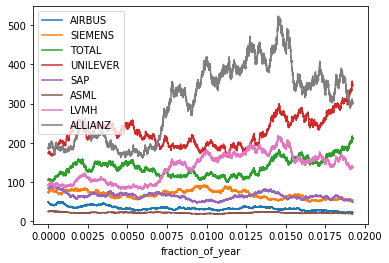

In [5]:
df.plot()